In [1]:
from IPython.display import display, Math

In [2]:
# As seguintes librarias serão necessárias para resolver os exercícios
import numpy as np # O numpy permite efetuar cálculos de forma eficiente
                   # sobre vários números (arrays)
import matplotlib.pyplot as plt # O matplotlib e o seu módulo pyplot oferecem
                                # uma interface simples para gerar gráficos

# Exercício 1

Numa partida de ténis, muitas vezes a bola é batida de modo a adquirir rotação, num eixo horizontal e
perpendicular à velocidade. Calcule a trajetória da bola, quando parte da posição inicial (-10,1,0) com a velocidade
130 km/h, a fazer um ângulo de 10º com a horizontal e no sentido positivo dum eixo horizontal OX. A bola de ténis
tem a massa 57 g, o diâmetro 67 mm e no ar tem a velocidade terminal 100 km/h. Calcule a altura máxima e o
alcance (quando bate em $y=0$) da trajetória da bola, quando.

Considere as forças peso, força de resistência do ar, e em rotação, a força de Magnus.

Começamos por definir algumas constantes e os paramêtros do método de Euler.

In [3]:
# Valores dados
g = 9.8
m = 0.057
# Nota: O valor dado é o do diâmetro mas as fórmulas utilizam o raio,
# logo precisamos de dividir o valor por 2 para obter o raio.
r = 0.067 / 2
p_ar = 1.225
# Convert angle from degrees to radians
angle = 10 / 180 * np.pi
# Converter as velocidades de km/h para m/s
vT = 100 * (1000/3600)
v0Norm = 130 * (1000/3600)

# Valores calculados
A = np.pi * r**2
D = g / vT**2
# Cálculo dos componentes da velocidade, o ângulo de 10° é com o eixo OX positivo na
# horizontal e como OY é o eixo vertical, isto quer dizer que a velocidade em z é nula.
v0x = np.cos(angle) * v0Norm
v0y = np.sin(angle) * v0Norm

# Parâmetros
dt = 0.001
t0 = 0
tf = 2
x0 = np.array([-10, 1, 0])
v0 = np.array([v0x, v0y, 0])

De seguida definimos a função da aceleração que varia com a rotação da bola e da velocidade atual.

In [4]:
# Esta função calcula a aceleração a partir da rotação da bola e da velocidade atual
def accel(w, v):
    vNorm = np.linalg.norm(v)
    # Cálculo da aceleração da resistência do ar
    aXRes = -D * vNorm * v[0]
    aYRes = -D * vNorm * v[1]
    aZRes = -D * vNorm * v[2]
    
    # Cálculo da força de Magnus, np.cross calcula o produto
    # vetorial de dois vetores.
    F_magnus = 1/2 * A * p_ar * r * np.cross(w, v)
    # Finalmente a aceleração é a soma da aceleração gravítica
    # e a soma da aceleração da força de Magnus
    return np.array([aXRes, -g + aYRes, aZRes]) + F_magnus/m

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# Agora lidamos com movimento tridimensional, logo precisamos de mais um
# elemento para os vetores das quantidades.
shape = (n + 1, 3)

Agora vamos aplicar o método de euler para os casos que são nos dados, além disso é nos também pedido que calculemos a altura máxima e o alcance:

## a) A rotação é nula

In [5]:
# Rotação nula
w = np.array([0, 0, 0])

t = np.zeros(n + 1)
x = np.zeros(shape)
v = np.zeros(shape)
a = np.zeros(shape)

# Insert initial values
a[0] = accel(w, v0)
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
    a[i + 1] = accel(w, v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

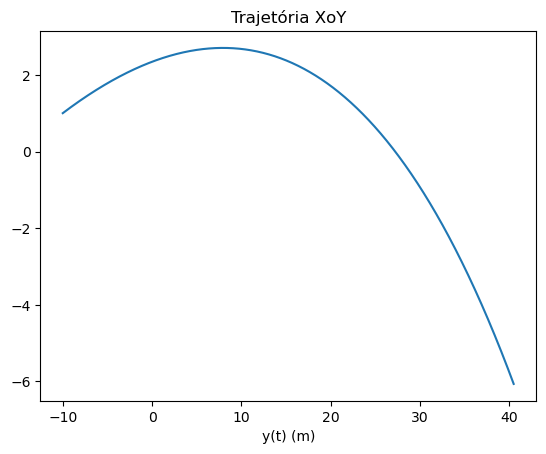

In [6]:
plt.plot(x[:, 0], x[:, 1])
plt.xlabel("x(t) (m)")
plt.xlabel("y(t) (m)")
plt.title("Trajetória XoY")
plt.show()

### Altura máxima

In [7]:
# np.argmax devolve o indíce do máximo no array
idx = x[:, 1].argmax()
yMax = x[idx, 1]
tMax = t[idx]

In [8]:
display(Math(r'y_{{ \text{{max}} }} = {:.8f} \; (\text{{m}})'.format(yMax)))
display(Math(r't_{{ \text{{max}} }} = {:.8f} \; (\text{{s}})'.format(tMax)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Alcance

In [9]:
for i in range(n):
    if x[i, 1] * x[i + 1, 1] < 0:
        idx = i
        break

xRange = x[idx, 0]
tRange = t[idx]

In [10]:
display(Math(r'x_{{ \text{{range}} }} = {:.8f} \; (\text{{m}})'.format(xRange)))
display(Math(r't_{{ \text{{range}} }} = {:.8f} \; (\text{{s}})'.format(tRange)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## b) A rotação é descrita por $\vec{\omega} = (0, 0, +100) \; \text{rad/s}$

In [11]:
w = np.array([0, 0, 100])

tRotPos = np.zeros(n + 1)
xRotPos = np.zeros(shape)
vRotPos = np.zeros(shape)
aRotPos = np.zeros(shape)

# Insert initial values
aRotPos[0] = accel(w, v0)
vRotPos[0] = v0
tRotPos[0] = t0
xRotPos[0] = x0

for i in range(n):
    aRotPos[i + 1] = accel(w, vRotPos[i])
    vRotPos[i + 1] = vRotPos[i] + aRotPos[i] * dt
    xRotPos[i + 1] = xRotPos[i] + vRotPos[i] * dt
    tRotPos[i + 1] = tRotPos[i] + dt

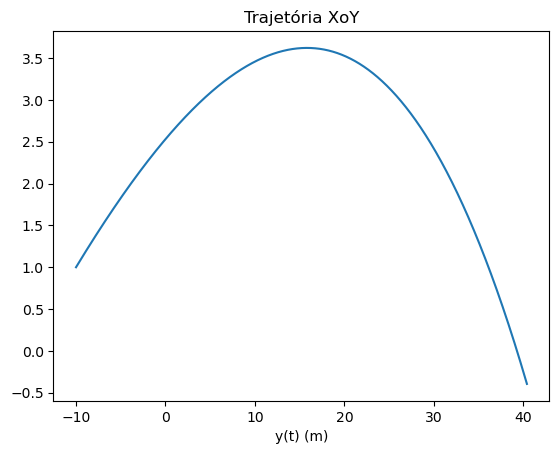

In [12]:
plt.plot(xRotPos[:, 0], xRotPos[:, 1])
plt.xlabel("x(t) (m)")
plt.xlabel("y(t) (m)")
plt.title("Trajetória XoY")
plt.show()

### Altura máxima

In [13]:
# np.argmax devolve o indíce do máximo no array
idx = xRotPos[:, 1].argmax()
yRotPosMax = xRotPos[idx, 1]
tRotPosMax = tRotPos[idx]

In [14]:
display(Math(r'y_{{ \text{{max}} }} = {:.8f} \; (\text{{m}})'.format(yRotPosMax)))
display(Math(r't_{{ \text{{max}} }} = {:.8f} \; (\text{{s}})'.format(tRotPosMax)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Alcance

In [15]:
for i in range(n):
    if xRotPos[i, 1] * xRotPos[i + 1, 1] < 0:
        idx = i
        break

xRotPosRange = xRotPos[idx, 0]
tRotPosRange = tRotPos[idx]

In [16]:
display(Math(r'x_{{ \text{{range}} }} = {:.8f} \; (\text{{m}})'.format(xRotPosRange)))
display(Math(r't_{{ \text{{range}} }} = {:.8f} \; (\text{{s}})'.format(tRotPosRange)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## c) A rotação é descrita por $\vec{\omega} = (0, 0, -100) \; \text{rad/s}$

In [17]:
w = np.array([0, 0, -100])

tRotNeg = np.zeros(n + 1)
xRotNeg = np.zeros(shape)
vRotNeg = np.zeros(shape)
aRotNeg = np.zeros(shape)

# Insert initial values
aRotNeg[0] = accel(w, v0)
vRotNeg[0] = v0
tRotNeg[0] = t0
xRotNeg[0] = x0

for i in range(n):
    aRotNeg[i + 1] = accel(w, vRotNeg[i])
    vRotNeg[i + 1] = vRotNeg[i] + aRotNeg[i] * dt
    xRotNeg[i + 1] = xRotNeg[i] + vRotNeg[i] * dt
    tRotNeg[i + 1] = tRotNeg[i] + dt

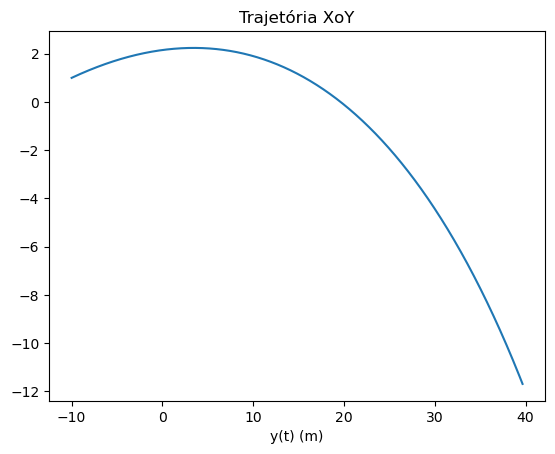

In [18]:
plt.plot(xRotNeg[:, 0], xRotNeg[:, 1])
plt.xlabel("x(t) (m)")
plt.xlabel("y(t) (m)")
plt.title("Trajetória XoY")
plt.show()

### Altura máxima

In [19]:
# np.argmax devolve o indíce do máximo no array
idx = xRotNeg[:, 1].argmax()
yRotNegMax = xRotNeg[idx, 1]
tRotNegMax = tRotNeg[idx]

In [20]:
display(Math(r'y_{{ \text{{max}} }} = {:.8f} \; (\text{{m}})'.format(yRotNegMax)))
display(Math(r't_{{ \text{{max}} }} = {:.8f} \; (\text{{s}})'.format(tRotNegMax)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Alcance

In [21]:
for i in range(n):
    if xRotNeg[i, 1] * xRotNeg[i + 1, 1] < 0:
        idx = i
        break

xRotNegRange = xRotNeg[idx, 0]
tRotNegRange = tRotNeg[idx]

In [22]:
display(Math(r'x_{{ \text{{range}} }} = {:.8f} \; (\text{{m}})'.format(xRotNegRange)))
display(Math(r't_{{ \text{{range}} }} = {:.8f} \; (\text{{s}})'.format(tRotNegRange)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercício 2

Uma mola exerce uma força $F_x = -k x(t)$, em que $k$ é a constante elástica da mola, num corpo de massa $m$.

Considere $k = 1 \; \text{N/m}$ e $m = 1 \; \text{kg}$

## Parte a

Mostre que a lei do $x(t) = A\cos(\omega t + \phi)$, com $\omega = \sqrt{k/m}$, é solução da equação dinâmica de Newton do sistema mola-corpo. Qual a lei de velocidade do corpo ligado à mola?

A equação dinâmica de Newton ou a equação fundamental da dinâmica é a seguinte

$$
\int_C \vec{F} \, d\vec{r} = \int_C m\vec{a} \, d\vec{r}
$$

Mas como só estamos a tratar de um movimento em uma dimensão podemos utilizar a seguinte equação mais
simples:

$$
\int_{x_0}^{x_1} F_x \, dx = \int_{x_0}^{x_1} m a_x \, dx
$$

Para provar que $x(t) = A \cos(\omega t + \phi)$ é a solução desta equação vamos começar por calcular $a_x$,
começamos por derivar $x(t)$ para obter a lei da velocidade (isto responde a questão de qual a lei de velocidade do corpo ligado à mola também):

$$
\begin{align*}
v_x(t)
&= \frac{dx}{dt}
= \frac{d}{dt} \left[ A \cos \left(\omega t + \phi \right) \right] \\
&= - A \omega \sin(\omega t + \phi)
\end{align*}
$$

Voltamos a derivar, agora a velocidade, para obter a aceleração:

$$
\begin{align*}
a_x(t)
&= \frac{dv_x}{dt}
= \frac{d}{dt} \left[ - A \omega \sin(\omega t + \phi) \right] \\
&= - A \omega^2 \cos(\omega t + \phi) \\
&= - A \left( \sqrt{\frac{k}{m}} \right)^2 \cos(\omega t + \phi) \\
&= - A \frac{k}{m} \cos(\omega t + \phi)
\end{align*}
$$

Agora que já temos a aceleração podemos verificar se a equação é verdadeira, começamos por expandir $F_x$:

$$
F_x = -k x(t) = -k A \cos(\omega t + \phi)
$$

Substituímos agora na equação: 

$$
\begin{align*}
\int_{x_0}^{x_1} F_x \, dx
&= \int_{x_0}^{x_1} m a_x \, dx \\
\Leftrightarrow
\int_{x_0}^{x_1} -k A \cos(\omega t + \phi) \, dx
&= \int_{x_0}^{x_1} m \times \left( - A \frac{k}{m} \cos(\omega t + \phi) \right) \, dx \\
\Leftrightarrow
\int_{x_0}^{x_1} -k A \cos(\omega t + \phi) \, dx
&= \int_{x_0}^{x_1} - k A \cos(\omega t + \phi) \, dx
\end{align*}
$$

Provamos assim que $x(t) = A\cos(\omega t + \phi)$ é solução da equação fundamental da dinâmica.

## Parte b

Calcule numericamente a lei da velocidade usando o método de Euler, e compare com o resultado analítico.

Considere nula a velocidade inicial e a posição inicial 4 m.

Começamos por calcular os valores de $A$ e $\phi$, como sabemos a posição e a velocidade iniciais podemos resolver as seguintes equações:

$$
\begin{align*}
0 &= v_x(0) \\
\Leftrightarrow 0 &= - A \omega \sin(\omega \times 0 + \phi) \\
\Leftrightarrow 0 &= \sin(\phi) \\
\Leftrightarrow \phi &= 2 k \pi \quad \forall k \in \mathbb{N}
\end{align*}
$$

Vamos utilizar $\phi = 0$ a partir daqui.

$$
\begin{align*}
4 &= x(0) \\
\Leftrightarrow 4 &= A \cos(\omega \times 0 + \phi) \\
\Leftrightarrow 4 &= A \cos(\phi) \\
\Leftrightarrow 4 &= A \times 1 \\
\Leftrightarrow 4 &= A
\end{align*}
$$

Agora que já temos os valores das constantes podemos calcular a lei da velocidade usando o método de euler.

In [23]:
# Valores dados
k = 1
m = 1

# Valores calculados
omega = np.sqrt(k/m)
A = 4
phi = 0

# Parâmetros
dt = 0.001
t0 = 0
tf = 10
x0 = 4
v0 = 0

In [24]:
# Esta função calcula a posição a partir do tempo atual
def pos(t):
    return A * np.cos(omega * t + phi)

# Esta função calcula a aceleração a partir do tempo atual
def accel(t):
    x = pos(t)
    return -k * x / m

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

In [25]:
t = np.zeros(n + 1)
x = np.zeros(n + 1)
v = np.zeros(n + 1)
a = np.zeros(n + 1)

# Insert initial values
a[0] = accel(t0)
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
    a[i + 1] = accel(t[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

Agora basta comparar os valores obtidos para a velocidade com o método de euler aos valores analíticos obtidos aplicando diretamente a função da lei da velocidade a $t$, começamos por calcular o erro máximo:

In [26]:
v_analytic = -A * omega * np.sin(omega * t + phi)
error = np.abs(v_analytic - v)
max_error = np.max(error)

print("Erro máximo: {:.8f}".format(max_error))

Erro máximo: 0.01200000


Podemos também esboçar um gráfico para obter uma visão mais geral entre as duas:

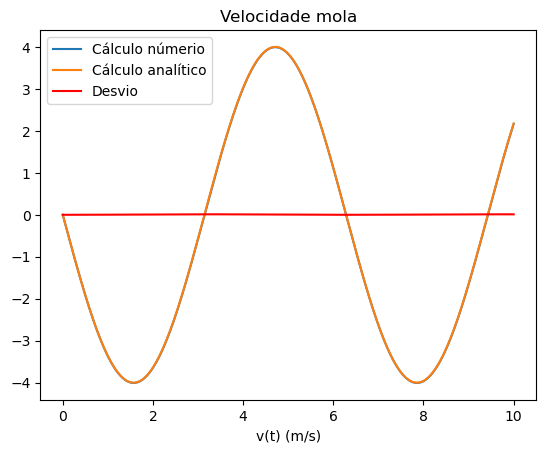

In [27]:
plt.plot(t, v, label="Cálculo númerio")
plt.plot(t, v_analytic, label="Cálculo analítico")
plt.plot(t, error, "r", label="Desvio")
plt.xlabel("t (s)")
plt.xlabel("v(t) (m/s)")
plt.title("Velocidade mola")
plt.legend(loc="upper left")
plt.show()

O método númerico não aparenta estar muito longe do resultado analítico, mas o erro vai piorando com a passagem do tempo.

## Parte c

Calcule numericamente a lei do movimento nas condições da alínea anterior. Compare com o resultado analítico.

Voltamos a calcular o erro máximo:

In [28]:
# Já calculamos o movimento com metódo de euler no código
x_analytic = pos(t) # Utilizamos a função posição já definida
x_error = np.abs(x_analytic - x)
x_max_error = np.max(x_error)

print("Erro máximo: {:.8f}".format(x_max_error))

Erro máximo: 0.06433807


E fazemos mais uma vez o gráfico das duas:

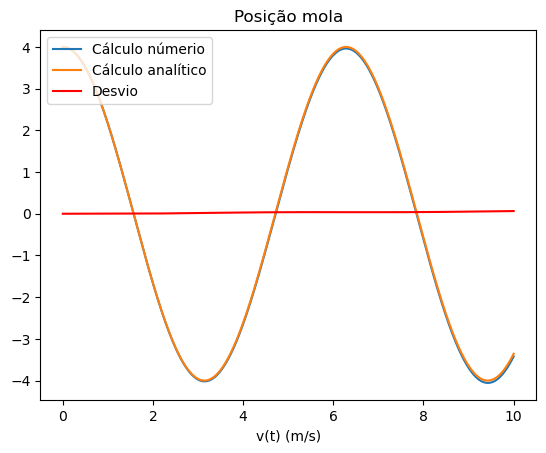

In [29]:
plt.plot(t, x, label="Cálculo númerio")
plt.plot(t, x_analytic, label="Cálculo analítico")
plt.plot(t, x_error, "r", label="Desvio")
plt.xlabel("t (s)")
plt.xlabel("v(t) (m/s)")
plt.title("Posição mola")
plt.legend(loc="upper left")
plt.show()

Mais uma vez, o método númerico não aparenta estar muito longe do resultado analítico, mas o erro é maior e vai piorando com a passagem do tempo mais.

## Parte d

Repita as alíneas b) e c) usando o método de Euler-Cromer. Qual método funciona melhor?

Começamos por voltar a realizar a método de euler, a diferença é no cálculo da posição em vez de utilizar $v(t)$ (passo anterior) utiliza $v(t + \partial t)$ (passo atual).

In [30]:
t_cromer = np.zeros(n + 1)
x_cromer = np.zeros(n + 1)
v_cromer = np.zeros(n + 1)
a_cromer = np.zeros(n + 1)

# Insert initial values
a_cromer[0] = accel(t0)
v_cromer[0] = v0
t_cromer[0] = t0
x_cromer[0] = x0

for i in range(n):
    a_cromer[i + 1] = accel(t[i])
    v_cromer[i + 1] = v_cromer[i] + a_cromer[i] * dt
    # Utilizamos v[i + 1] em vez de v[i] para o método de Euler-Cromer
    # Nota: Até agora não fazia diferença se a velocidade era calculada antes
    # ou depois da posição dentro do loop, mas agora que dependemos do valor
    # atual da velocidade este precisa de ser calculado primeiro.
    x_cromer[i + 1] = x_cromer[i] + v_cromer[i + 1] * dt
    t_cromer[i + 1] = t_cromer[i] + dt

Tratando agora da alínea b), voltamos a calcular o erro máximo para o cálculo da velocidade:

In [31]:
error_cromer = np.abs(v_analytic - v_cromer)
max_error_cromer = np.max(error_cromer)

print("Erro máximo: {:.8f}".format(max_error_cromer))

Erro máximo: 0.01200000


E a esboçar o gráfico entre as duas quantidades:

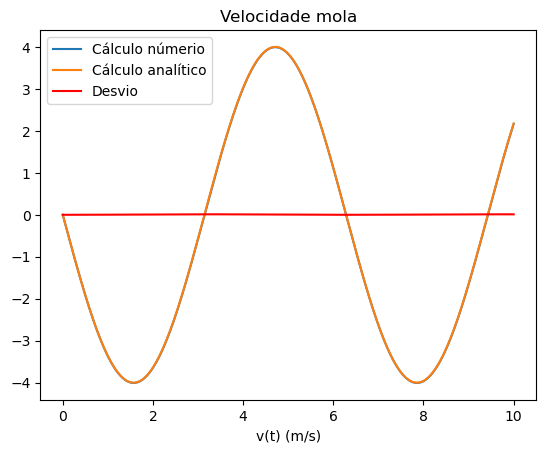

In [32]:
plt.plot(t, v_cromer, label="Cálculo númerio")
plt.plot(t, v_analytic, label="Cálculo analítico")
plt.plot(t, error_cromer, "r", label="Desvio")
plt.xlabel("t (s)")
plt.xlabel("v(t) (m/s)")
plt.title("Velocidade mola")
plt.legend(loc="upper left")
plt.show()

Não aparenta haver diferença entres o método de Euler e o de Euler-Cromer para o cálculo da velocidade, o que era esperado visto que a velocidade é calculada da mesma maneira nos dois métodos.

Passando agora para a alínea c) voltamos a repetir os mesmos passos:

In [33]:
x_error_cromer = np.abs(x_analytic - x_cromer)
x_max_error_cromer = np.max(x_error_cromer)

print("Erro máximo: {:.8f}".format(x_max_error_cromer))

Erro máximo: 0.06217302


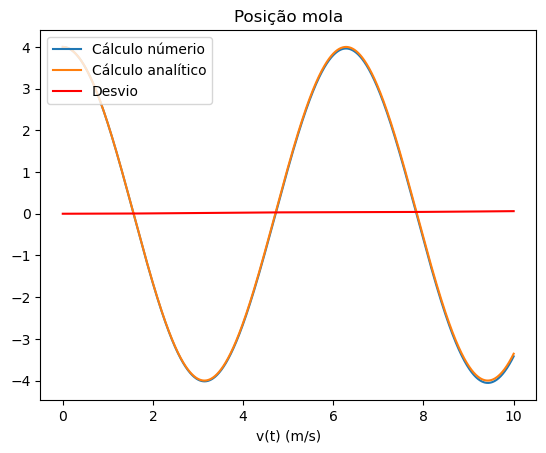

In [35]:
plt.plot(t, x_cromer, label="Cálculo númerio")
plt.plot(t, x_analytic, label="Cálculo analítico")
plt.plot(t, x_error_cromer, "r", label="Desvio")
plt.xlabel("t (s)")
plt.xlabel("v(t) (m/s)")
plt.title("Posição mola")
plt.legend(loc="upper left")
plt.show()

O cálculo da posição apresenta diferenças entre os dois métodos, o método de Euler-Cromer parece apresentar um erro menor do que o método de Euler.